In [1]:
# Modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Keras
from keras.models import Sequential
from keras.layers import Dense

# Dataset
df = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/HousePrices.csv")

# Mostremos algo de informacion
print("Filas-Columnas", df.shape)

Filas-Columnas (1460, 81)


In [2]:
# Nombre de columnas
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# Redefinamos df eliminando la primera columna : Id
df = df.iloc[:, 1:]

In [6]:
# Datos faltantes
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [9]:
# Construyamos una lista con las variables numericas :
  # int64
  # float64
ListaVarNumericas = []
for col in df.columns:
  if (df[col].dtype == "int64") or (df[col].dtype == "float64"):
    ListaVarNumericas.append(col)

ListaVarNumericas


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [11]:
# Observemos si el dataframe df restringido a las columnas de tipo numericas
# posee elementos faltantes
df_Num = df[ListaVarNumericas]
df_Num.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [12]:
# Rellenemos los valores faltantes de df_Num
df_Num = df_Num.fillna(df_Num.mean())

In [13]:
# Verifiquemos la No existencia de valores faltantes
df_Num.isnull().sum().sort_values(ascending=False)

MSSubClass       0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
FullBath         0
LotFrontage      0
BsmtHalfBath     0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
SalePrice        0
dtype: int64

In [21]:
# Definamos :
  # y : variable dependiente
  # X : Variables Independientes

X = df_Num.iloc[:, :-1]
y = df_Num.SalePrice

# Particionamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1)

#
# Construccion de una red neuronal (Perceptron Multicapa) para mi
# problema de regresion
#

# Instancia de la clase Sequential
ModelHouseBase = Sequential()

# Agregar las capas ocultas : Recordar que la primera capa oculta tiene informacion
# del numero de variables independientes
ModelHouseBase.add(Dense(units = 10,
                         input_dim = X.shape[1],
                         activation = "relu"))

# Agreguemos 6 capas ocultas
ModelHouseBase.add(Dense(units = 16,
                          activation="elu"))

ModelHouseBase.add(Dense(units = 24,
                          activation = "selu"))

ModelHouseBase.add(Dense(units = 15,
                          activation = "relu"))

ModelHouseBase.add(Dense(units = 14,
                          activation = "tanh"))

ModelHouseBase.add(Dense(units = 3,
                          activation = "sigmoid"))

ModelHouseBase.add(Dense(units = 5,
                          activation = "elu"))

# Capa de salida
ModelHouseBase.add(Dense(units = 1,activation = "relu"))

# Compilacion  del modelo
ModelHouseBase.compile(loss = "mean_absolute_error",
                       optimizer = "adam",
                       metrics = "mean_absolute_percentage_error")

# Ajuste
HistoriaAjusteModelBase = ModelHouseBase.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Calculemos pronosticos de la variable dependiente : Usando el modelo recien
# ajustado y los datos de testeo de la variable independiente
y_forecastBase = ModelHouseBase.predict(X_test)

# Indicador de calidad
MAPE1_Base = metrics.mean_absolute_percentage_error(y_test, y_forecastBase)
MAPE1_Base


Epoch 1/100
132/132 [==============================] - 2s 3ms/step - loss: 181412.4062 - mean_absolute_percentage_error: 100.0000
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 181412.3906 - mean_absolute_percentage_error: 100.0000
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 181412.4062 - mean_absolute_percentage_error: 100.0000
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 181412.3906 - mean_absolute_percentage_error: 100.0000
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 181412.3906 - mean_absolute_percentage_error: 100.0000
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 181412.4219 - mean_absolute_percentage_error: 100.0000
Epoch 7/100
132/132 [==============================] - 0s 3ms/step - loss: 181412.4062 - mean_absolute_percentage_error: 100.0000
Epoch 8/100
132/132 [==============================] - 0s 3ms/step - loss: 181412.4062 - m

1.0

In [20]:
ModelHouseBase.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                370       
                                                                 
 dense_15 (Dense)            (None, 16)                176       
                                                                 
 dense_16 (Dense)            (None, 24)                408       
                                                                 
 dense_17 (Dense)            (None, 15)                375       
                                                                 
 dense_18 (Dense)            (None, 14)                224       
                                                                 
 dense_19 (Dense)            (None, 3)                 45        
                                                                 
 dense_20 (Dense)            (None, 5)                

In [22]:
# Analicemos al objeto
type(HistoriaAjusteModelBase)

keras.src.callbacks.History

In [23]:
# Lista de metodos
dir(HistoriaAjusteModelBase)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
# Metodos de interes
# 'epoch',
#  'history',
#  'model',
#  'on_batch_begin',
#  'on_batch_end',
#  'on_epoch_begin',
#  'on_epoch_end',
#  'on_predict_batch_begin',
#  'on_predict_batch_end',
#  'on_predict_begin',
#  'on_predict_end',
#  'on_test_batch_begin',
#  'on_test_batch_end',
#  'on_test_begin',
#  'on_test_end',
#  'on_train_batch_begin',
#  'on_train_batch_end',
#  'on_train_begin',
#  'on_train_end',
#  'params',
#  'set_model',
#  'set_params',
#  'validation_data'

In [25]:
# Al aplicar el atributo history obtenemos un diccionario
HistoriaAjusteModelBase.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error'])

In [26]:
# Informacion almacenada por la llave "loss"
HistoriaAjusteModelBase.history["loss"]

[181412.40625,
 181412.390625,
 181412.40625,
 181412.390625,
 181412.390625,
 181412.421875,
 181412.40625,
 181412.40625,
 181412.359375,
 181412.375,
 181412.4375,
 181412.375,
 181412.4375,
 181412.375,
 181412.390625,
 181412.390625,
 181412.375,
 181412.390625,
 181412.4375,
 181412.390625,
 181412.453125,
 181412.390625,
 181412.375,
 181412.4375,
 181412.390625,
 181412.390625,
 181412.375,
 181412.390625,
 181412.390625,
 181412.359375,
 181412.328125,
 181412.421875,
 181412.421875,
 181412.4375,
 181412.40625,
 181412.375,
 181412.328125,
 181412.390625,
 181412.40625,
 181412.375,
 181412.40625,
 181412.34375,
 181412.390625,
 181412.390625,
 181412.390625,
 181412.390625,
 181412.390625,
 181412.40625,
 181412.359375,
 181412.40625,
 181412.390625,
 181412.34375,
 181412.359375,
 181412.421875,
 181412.4375,
 181412.40625,
 181412.390625,
 181412.40625,
 181412.4375,
 181412.40625,
 181412.40625,
 181412.40625,
 181412.390625,
 181412.375,
 181412.4375,
 181412.390625,
 18

Text(0.5, 1.0, 'Evolucion de loss')

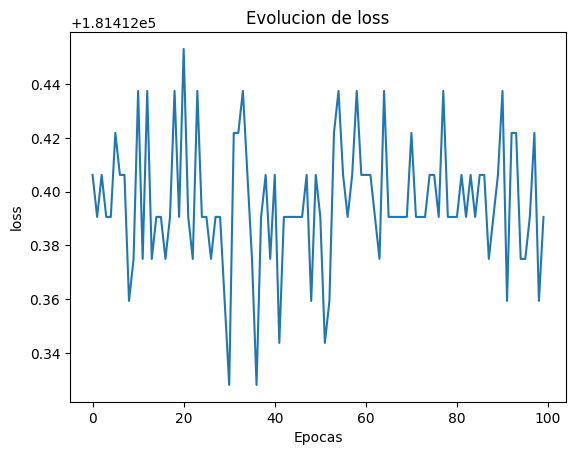

In [28]:
# Visualicemos como se comparta esos valores de la llave "loss"
plt.plot(HistoriaAjusteModelBase.history["loss"])
plt.xlabel("Epocas")
plt.ylabel("loss")
plt.title("Evolucion de loss")

Text(0.5, 1.0, 'Evolucion del MAPE (Train)')

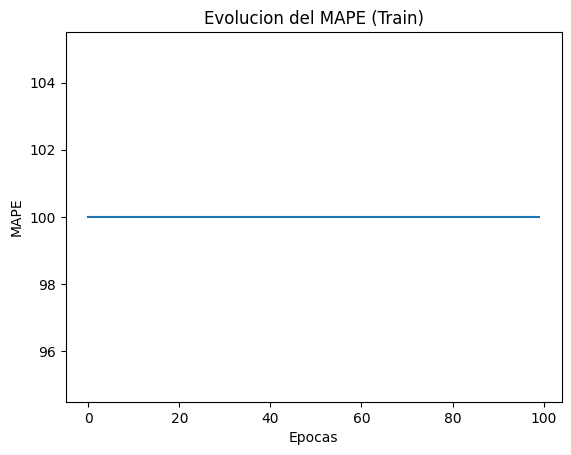

In [29]:
# Evolucion del MAPE en entrenamiento
plt.plot(HistoriaAjusteModelBase.history["mean_absolute_percentage_error"])
plt.xlabel("Epocas")
plt.ylabel("MAPE")
plt.title("Evolucion del MAPE (Train)")

# JUntemos este analisis

Epoch 1/1200
132/132 [==============================] - 4s 4ms/step - loss: 99.7448 - mean_absolute_percentage_error: 99.7448
Epoch 2/1200
132/132 [==============================] - 0s 4ms/step - loss: 47.8094 - mean_absolute_percentage_error: 47.8094
Epoch 3/1200
132/132 [==============================] - 0s 3ms/step - loss: 29.5506 - mean_absolute_percentage_error: 29.5506
Epoch 4/1200
132/132 [==============================] - 1s 4ms/step - loss: 29.6827 - mean_absolute_percentage_error: 29.6827
Epoch 5/1200
132/132 [==============================] - 0s 4ms/step - loss: 29.5232 - mean_absolute_percentage_error: 29.5232
Epoch 6/1200
132/132 [==============================] - 1s 4ms/step - loss: 29.3967 - mean_absolute_percentage_error: 29.3967
Epoch 7/1200
132/132 [==============================] - 0s 4ms/step - loss: 29.4021 - mean_absolute_percentage_error: 29.4021
Epoch 8/1200
132/132 [==============================] - 1s 4ms/step - loss: 29.4978 - mean_absolute_percentage_error: 

Text(0.5, 1.0, 'Evolucion del MAPE (Train)')

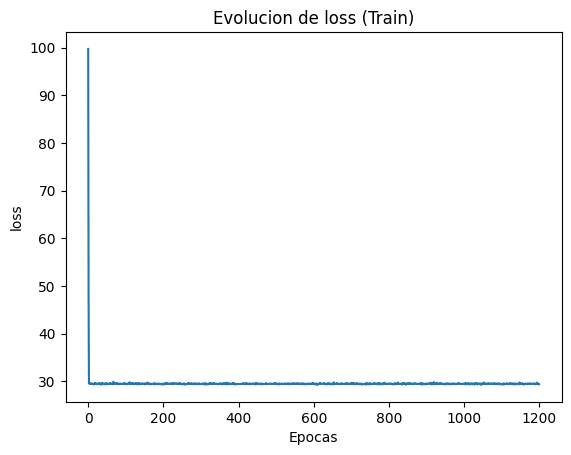

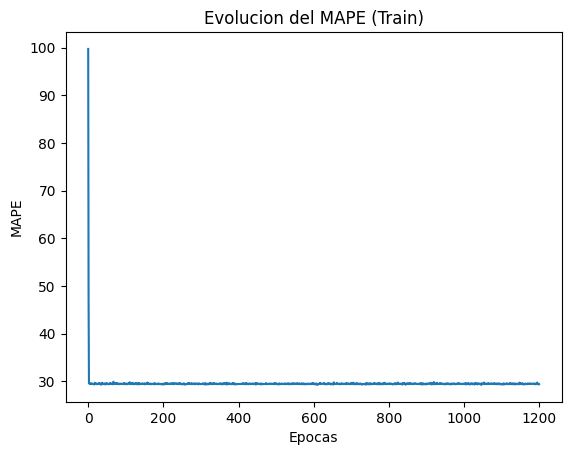

In [34]:
# Definamos :
  # y : variable dependiente
  # X : Variables Independientes

X = df_Num.iloc[:, :-1]
y = df_Num.SalePrice

# Particionamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1)

#
# Construccion de una red neuronal (Perceptron Multicapa) para mi
# problema de regresion
#

# Instancia de la clase Sequential
ModelHouseBase = Sequential()

# Agregar las capas ocultas : Recordar que la primera capa oculta tiene informacion
# del numero de variables independientes
ModelHouseBase.add(Dense(units = 10,
                         input_dim = X.shape[1],
                         activation = "relu"))

# Agreguemos 6 capas ocultas
ModelHouseBase.add(Dense(units = 16,
                          activation="elu"))

ModelHouseBase.add(Dense(units = 24,
                          activation = "selu"))

ModelHouseBase.add(Dense(units = 15,
                          activation = "relu"))

ModelHouseBase.add(Dense(units = 14,
                          activation = "tanh"))

ModelHouseBase.add(Dense(units = 3,
                          activation = "sigmoid"))

ModelHouseBase.add(Dense(units = 5,
                          activation = "elu"))

# Cambio 2: Agreguemos 4 capas ocultas mas
ModelHouseBase.add(Dense(units = 15,
                         activation = "relu"))
ModelHouseBase.add(Dense(units = 20,
                         activation = "relu"))
ModelHouseBase.add(Dense(units = 25,
                         activation = "relu"))
ModelHouseBase.add(Dense(units = 5,
                         activation = "relu"))

# Cambio 5: Agreguemos otras 4 capas ocultas mas
ModelHouseBase.add(Dense(units = 30,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 28,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 25,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 15,
                         activation = "selu"))

# Capa de salida
ModelHouseBase.add(Dense(units = 1,activation = "relu"))

# Compilacion  del modelo
#
# Cambio 1 : MOdifiquemos la funcion de perdida : loss
# de "mean_absolute_error" a "mean_absolute_percentage_error"
ModelHouseBase.compile(loss = "mean_absolute_percentage_error",
                       optimizer = "adam",
                       metrics = "mean_absolute_percentage_error")

# Ajuste
# Cambio 3 : Aumentemos el numero de epocas
# En el ajuste, pasamos de usar 200 epocas a 400 epocas
# Cambio 4 : Medir el tiempo de ajuste
import time
inicio = time.time()
HistoriaAjusteModelBase = ModelHouseBase.fit(X_train, y_train, batch_size = 10, epochs = 1200)
fin = time.time()

# Calculemos pronosticos de la variable dependiente : Usando el modelo recien
# ajustado y los datos de testeo de la variable independiente
y_forecastBase = ModelHouseBase.predict(X_test)

# Indicador de calidad
MAPE1_Base = metrics.mean_absolute_percentage_error(y_test, y_forecastBase)
print("*"*100)
print("MAPE (Test)", MAPE1_Base*100)
print("Tiempo de Procesamiento ", fin-inicio)
print("*"*100)

# Visualicemos como se comparta esos valores de la llave "loss"
plt.figure(num=1)
plt.plot(HistoriaAjusteModelBase.history["loss"])
plt.xlabel("Epocas")
plt.ylabel("loss")
plt.title("Evolucion de loss (Train)")

# Evolucion del MAPE en entrenamiento
plt.figure(num=2)
plt.plot(HistoriaAjusteModelBase.history["mean_absolute_percentage_error"])
plt.xlabel("Epocas")
plt.ylabel("MAPE")
plt.title("Evolucion del MAPE (Train)")

# Conclusiones de la pizarra

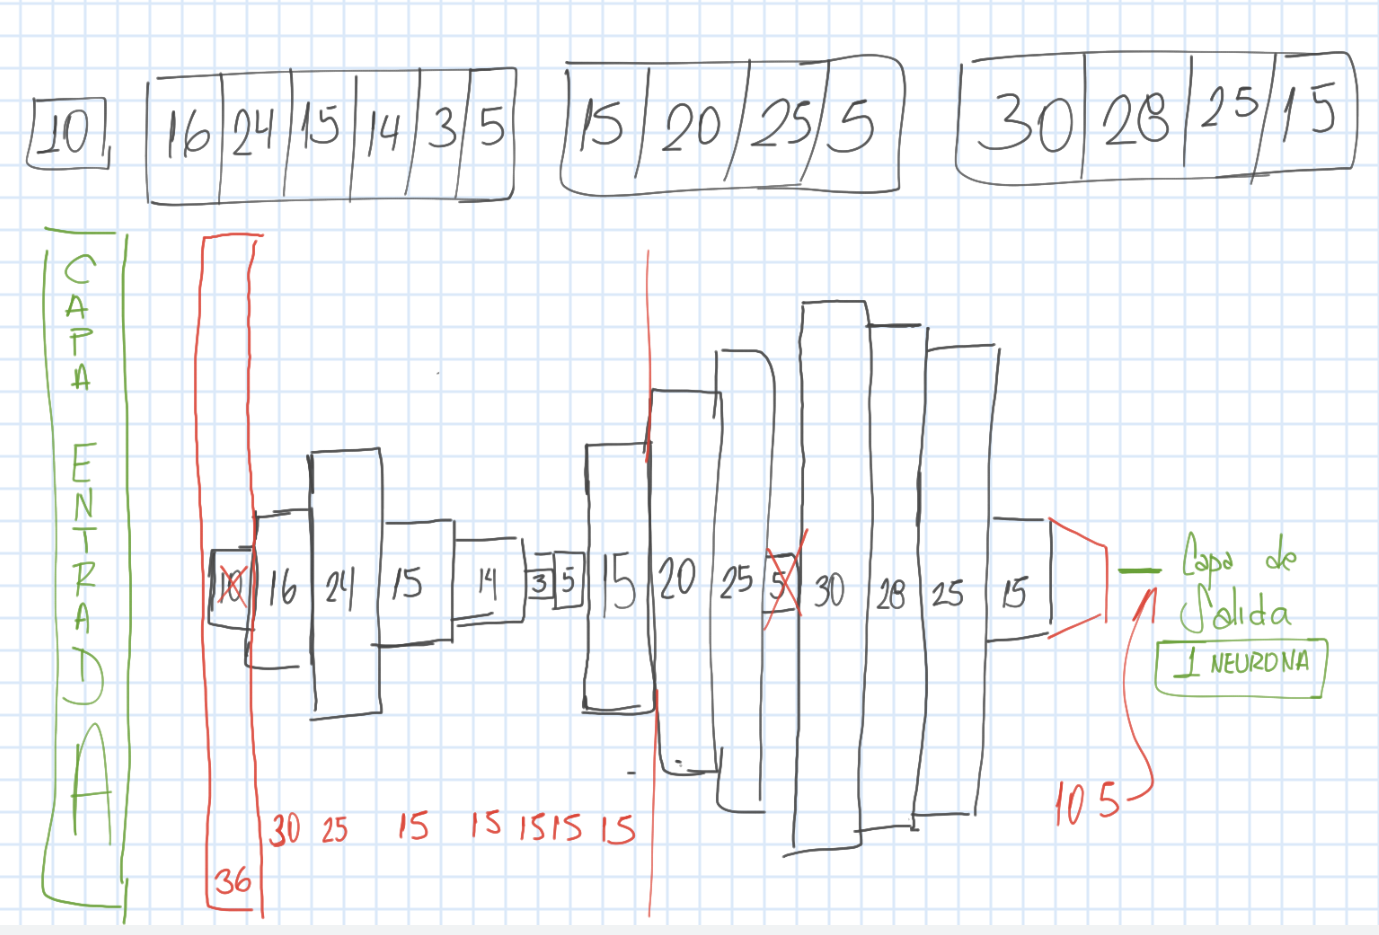

In [40]:

# Definamos :
  # y : variable dependiente
  # X : Variables Independientes

X = df_Num.iloc[:, :-1]
y = df_Num.SalePrice

# Particionamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1)

#
# Construccion de una red neuronal (Perceptron Multicapa) para mi
# problema de regresion
#

# Instancia de la clase Sequential
ModelHouseBase = Sequential()

# Agregar las capas ocultas : Recordar que la primera capa oculta tiene informacion
# del numero de variables independientes
ModelHouseBase.add(Dense(units = 36,
                         input_dim = X.shape[1],
                         activation = "relu"))

# Agreguemos 6 capas ocultas
ModelHouseBase.add(Dense(units = 30,
                          activation="elu"))

ModelHouseBase.add(Dense(units = 25,
                          activation = "selu"))

ModelHouseBase.add(Dense(units = 15,
                          activation = "relu"))

ModelHouseBase.add(Dense(units = 15,
                          activation = "tanh"))

ModelHouseBase.add(Dense(units = 15,
                          activation = "sigmoid"))

ModelHouseBase.add(Dense(units = 15,
                          activation = "elu"))

# Cambio 2: Agreguemos 4 capas ocultas mas
ModelHouseBase.add(Dense(units = 15,
                         activation = "relu"))


ModelHouseBase.add(Dense(units = 20,
                         activation = "relu"))
ModelHouseBase.add(Dense(units = 25,
                         activation = "relu"))

# Comentamos esta capa deacuerdo a lo concluido en la pizarra
# ModelHouseBase.add(Dense(units = 5,
#                          activation = "relu"))

# Cambio 5: Agreguemos otras 4 capas ocultas mas
ModelHouseBase.add(Dense(units = 30,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 28,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 25,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 15,
                         activation = "selu"))


ModelHouseBase.add(Dense(units = 10,
                         activation = "selu"))
ModelHouseBase.add(Dense(units = 5,
                         activation = "selu"))

# Capa de salida
ModelHouseBase.add(Dense(units = 1,activation = "relu"))

# Compilacion  del modelo
#
# Cambio 1 : MOdifiquemos la funcion de perdida : loss
# de "mean_absolute_error" a "mean_absolute_percentage_error"

# De lo conversado en pizarra : Usemos un optimizador propio
from keras import optimizers
Opt_Adam1 = optimizers.Adam(learning_rate= 10**(-5))
ModelHouseBase.compile(loss = "mean_absolute_percentage_error",
                       optimizer = Opt_Adam1,
                       metrics = "mean_absolute_percentage_error")

# Ajuste
# Cambio 3 : Aumentemos el numero de epocas
# En el ajuste, pasamos de usar 200 epocas a 400 epocas
# Cambio 4 : Medir el tiempo de ajuste
import time
inicio = time.time()
HistoriaAjusteModelBase = ModelHouseBase.fit(X_train, y_train, batch_size = 10, epochs = 600)
fin = time.time()

# Calculemos pronosticos de la variable dependiente : Usando el modelo recien
# ajustado y los datos de testeo de la variable independiente
y_forecastBase = ModelHouseBase.predict(X_test)

# Indicador de calidad
MAPE1_Base = metrics.mean_absolute_percentage_error(y_test, y_forecastBase)
print("*"*100)
print("MAPE (Test)", MAPE1_Base*100)
print("Tiempo de Procesamiento ", fin-inicio)
print("*"*100)

# Visualicemos como se comparta esos valores de la llave "loss"
plt.figure(num=1)
plt.plot(HistoriaAjusteModelBase.history["loss"])
plt.xlabel("Epocas")
plt.ylabel("loss")
plt.title("Evolucion de loss (Train)")

# Evolucion del MAPE en entrenamiento
plt.figure(num=2)
plt.plot(HistoriaAjusteModelBase.history["mean_absolute_percentage_error"])
plt.xlabel("Epocas")
plt.ylabel("MAPE")
plt.title("Evolucion del MAPE (Train)")

Epoch 1/600
132/132 [==============================] - 4s 4ms/step - loss: 99.9998 - mean_absolute_percentage_error: 99.9998
Epoch 2/600
132/132 [==============================] - 0s 3ms/step - loss: 99.9993 - mean_absolute_percentage_error: 99.9993
Epoch 3/600
132/132 [==============================] - 1s 4ms/step - loss: 99.9988 - mean_absolute_percentage_error: 99.9988
Epoch 4/600
132/132 [==============================] - 0s 4ms/step - loss: 99.9984 - mean_absolute_percentage_error: 99.9984
Epoch 5/600
132/132 [==============================] - 1s 4ms/step - loss: 99.9980 - mean_absolute_percentage_error: 99.9980
Epoch 6/600
132/132 [==============================] - 0s 4ms/step - loss: 99.9977 - mean_absolute_percentage_error: 99.9977
Epoch 7/600
132/132 [==============================] - 1s 4ms/step - loss: 99.9974 - mean_absolute_percentage_error: 99.9974
Epoch 8/600
132/132 [==============================] - 0s 4ms/step - loss: 99.9970 - mean_absolute_percentage_error: 99.9970


Text(0.5, 1.0, 'Evolucion del MAPE (Train)')

In [ ]:
# Algunas cosas a experimentar
  # Sin modificar el codigo : Aumentar el numero de epocas a 10000

  # Manteniendo la naturaleza de lo explicado en pizarra el dia de hoy , aumentar el numero
  # de capas ocultas. (epocas = 10000)

  # Aumentar el numero de neuronas en funciona lo explicado en pizarra